# **Intial Preparation of Data and Data Cleaning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CPE_Data.csv')

In [3]:
df.head()

,id,starttime,cellular_updated_at,rsrp,rsrq,rssi,signal,signal_quality,sinr,rx,...,uptime,location_pin,location_isstatic,group_name,modem_name,modem_status,temperature,predicted_cell_rsrp,current_cell_name,location_timestamp
0,"235,621","Jan 24, 2022 @ 09:41:00.000","Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,-86,14.5,14.5,"42,124",...,"247,933","{\n ""coordinates"": [\n -2.678117,\n 58....",false,Moray East - Vestas,Cellular 2,Connected to 999 99,43.25,-95,VME22,"Jan 24, 2022 @ 09:40:28.000"
1,"235,622","Jan 24, 2022 @ 09:41:00.000","Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,-86,14.5,14.5,"42,124",...,"247,953","{\n ""coordinates"": [\n -2.678117,\n 58....",false,Moray East - Vestas,Cellular 2,Connected to 999 99,43.25,-95,VME22,"Jan 24, 2022 @ 09:40:28.000"
2,"235,623","Jan 24, 2022 @ 09:41:00.000","Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,-85,17.1,17.1,"42,124",...,"247,953","{\n ""coordinates"": [\n -2.678117,\n 58....",false,Moray East - Vestas,Cellular 1,Connected to 999 99,43.25,-95,VME22,"Jan 24, 2022 @ 09:40:28.000"
3,"235,620","Jan 24, 2022 @ 09:41:00.000","Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,-85,17.1,17.1,"42,124",...,"247,933","{\n ""coordinates"": [\n -2.678117,\n 58....",false,Moray East - Vestas,Cellular 1,Connected to 999 99,43.25,-95,VME22,"Jan 24, 2022 @ 09:40:28.000"
4,"235,618","Jan 24, 2022 @ 09:40:45.000","Jan 24, 2022 @ 09:40:45.000",-85,-11,-55,-85,17.0,17.0,"5,029",...,"247,913","{\n ""coordinates"": [\n -2.678117,\n 58....",false,Moray East - Vestas,Cellular 1,Connected to 999 99,43.188,-95,VME22,"Jan 24, 2022 @ 09:40:28.000"


In [13]:
# dataframe without (w/o) meta data with cell name
df_wo_meta_cell_name=df[['starttime','rsrp','rsrq', 'rssi', 'sinr', 'rx', 'tx', 'longitude', 'latitude', 'speed', 'current_cell_name']]

In [15]:
df_wo_meta_cell_name.head()

,starttime,rsrp,rsrq,rssi,sinr,rx,tx,longitude,latitude,speed,current_cell_name
0,"Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,14.5,"42,124","3,441",-2.678,58.119,5.335,VME22
1,"Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,14.5,"42,124","3,441",-2.678,58.119,5.562,VME22
2,"Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,17.1,"42,124","3,441",-2.678,58.119,5.562,VME22
3,"Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,17.1,"42,124","3,441",-2.678,58.119,5.335,VME22
4,"Jan 24, 2022 @ 09:40:45.000",-85,-11,-55,17.0,"5,029","2,509",-2.678,58.119,5.327,VME22


In [14]:
# dataframe without (w/o) meta data w/o cell name
df_wo_meta=df[['starttime','rsrp','rsrq', 'rssi', 'sinr', 'rx', 'tx', 'longitude', 'latitude', 'speed']]

In [16]:
df_wo_meta.head()

,starttime,rsrp,rsrq,rssi,sinr,rx,tx,longitude,latitude,speed
0,"Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,14.5,"42,124","3,441",-2.678,58.119,5.335
1,"Jan 24, 2022 @ 09:41:00.000",-86,-14,-48,14.5,"42,124","3,441",-2.678,58.119,5.562
2,"Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,17.1,"42,124","3,441",-2.678,58.119,5.562
3,"Jan 24, 2022 @ 09:41:00.000",-85,-16,-46,17.1,"42,124","3,441",-2.678,58.119,5.335
4,"Jan 24, 2022 @ 09:40:45.000",-85,-11,-55,17.0,"5,029","2,509",-2.678,58.119,5.327


In [17]:
df_wo_meta.describe()

,rsrp,rsrq,rssi,sinr,longitude,latitude
count,27116.000000,27116.000000,27116.000000,27116.000000,27116.000000,27116.000000
mean,-86.391651,-11.157914,-54.589025,15.800933,-2.748405,58.197263
std,5.673418,1.532629,5.752201,2.504046,0.076290,0.069163
min,-101.000000,-20.000000,-68.000000,-7.400000,-2.849000,58.071000
25%,-90.000000,-12.000000,-59.000000,14.200000,-2.810000,58.111000
50%,-87.000000,-11.000000,-55.000000,16.000000,-2.771000,58.217000
75%,-83.000000,-10.000000,-51.000000,17.500000,-2.685000,58.248000
max,-49.000000,-7.000000,-14.000000,25.000000,-2.597000,58.298000


# **Exploratory Data Analysis (EDA)**

### RSRP Histogram

In [7]:
df_wo_meta['rsrp'].value_counts()

-88     2917
-87     2377
-89     1985
-91     1849
-86     1789
-85     1647
-90     1564
-84     1477
-92     1415
-83     1341
-82     1325
-81     1206
-80      969
-93      886
-79      772
-95      732
-94      636
-78      514
-96      398
-77      303
-76      167
-97      121
-75      119
-74       81
-98       58
-61       46
-73       42
-59       42
-60       40
-99       37
-58       30
-72       30
-52       28
-62       22
-70       16
-50       16
-63       15
-57       11
-71       11
-100      11
-64       10
-51        9
-56        9
-68        8
-69        7
-53        6
-55        6
-67        3
-54        3
-49        3
-65        3
-66        3
-101       1
Name: rsrp, dtype: int64

In [8]:
values_rsrp = df_wo_meta['rsrp'].value_counts(dropna=False).keys().tolist()
counts_rsrp = df_wo_meta['rsrp'].value_counts(dropna=False).tolist()
value_dict_rsrp = dict(zip(values_rsrp, counts_rsrp))

In [9]:
value_dict_rsrp

{-101: 1,
 -100: 11,
 -99: 37,
 -98: 58,
 -97: 121,
 -96: 398,
 -95: 732,
 -94: 636,
 -93: 886,
 -92: 1415,
 -91: 1849,
 -90: 1564,
 -89: 1985,
 -88: 2917,
 -87: 2377,
 -86: 1789,
 -85: 1647,
 -84: 1477,
 -83: 1341,
 -82: 1325,
 -81: 1206,
 -80: 969,
 -79: 772,
 -78: 514,
 -77: 303,
 -76: 167,
 -75: 119,
 -74: 81,
 -73: 42,
 -72: 30,
 -71: 11,
 -70: 16,
 -69: 7,
 -68: 8,
 -67: 3,
 -66: 3,
 -65: 3,
 -64: 10,
 -63: 15,
 -62: 22,
 -61: 46,
 -60: 40,
 -59: 42,
 -58: 30,
 -57: 11,
 -56: 9,
 -55: 6,
 -54: 3,
 -53: 6,
 -52: 28,
 -51: 9,
 -50: 16,
 -49: 3}

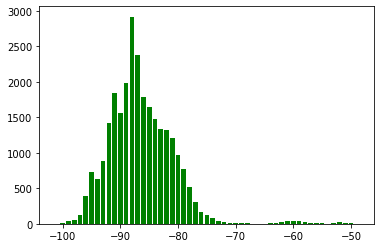

In [10]:
fig=plt.bar(list(value_dict_rsrp.keys()), value_dict_rsrp.values(), color='g')
plt.show()

In [ ]:
fig.set_title('Amount Frequency')
fig.set_xlabel('Amount ($)')
fig.set_ylabel('Frequency')
fig.set_xticklabels(x_labels)

AttributeError: ignored

### RSRQ Histogram

### RSSI Histogram

### SINR Histogram

### Longitude and Latitude Scatterplot

Trying to see if there's a trend in the way the boat moves

In [ ]:
df_wo_meta['longitude'].value_counts()

-2.815    1265
-2.789    1232
-2.842    1134
-2.762    1098
-2.841    1044
          ... 
-2.848       6
-2.618       6
-2.825       6
-2.790       4
-2.793       4
Name: longitude, Length: 215, dtype: int64

In [ ]:
df_wo_meta['latitude'].value_counts()

58.106    1975
58.227    1913
58.197    1628
58.072    1464
58.105    1150
          ... 
58.098       6
58.165       6
58.080       6
58.075       6
58.150       6
Name: latitude, Length: 210, dtype: int64

In [ ]:
values = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).keys().tolist()
counts = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))